In [9]:
'''
Добрый день, дорогой участник курса!
Должно быть, ты читаешь эти строки, чтобы твою работу поскорей проверили.
Запускай окошки последовательно в директории с данными - и будет тебе счастье.
'''
#импортируем всё, что нужно для счастья
import time
import datetime
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
import numpy as np
from sklearn.model_selection import KFold
import pandas

#извлекаем признаки
features = pandas.read_csv('./features.csv', index_col='match_id')
#сохраним целевую переменную - победила или нет команда radiant
y=features.radiant_win

#Удалим всё, что не относится к первым пяти минутам
features=features.drop(['duration','radiant_win','tower_status_radiant',
               'tower_status_dire','barracks_status_radiant','barracks_status_dire'],axis=1)

#features=features.drop(['duration','tower_status_radiant',
#                        'tower_status_dire','barracks_status_radiant','barracks_status_dire'],axis=1)


#Проверяем наличие NaN значений. Если они есть, выведем информацию об этом
# list(df.columns.values) - список имён колонок 
for column_name in list(features.columns.values):
    if(features[column_name].count()!=features.shape[0]):
        print(column_name,' omits ',features.shape[0]-features[column_name].count(),' values;')



first_blood_time  omits  19553  values;
first_blood_team  omits  19553  values;
first_blood_player1  omits  19553  values;
first_blood_player2  omits  43987  values;
radiant_bottle_time  omits  15691  values;
radiant_courier_time  omits  692  values;
radiant_flying_courier_time  omits  27479  values;
radiant_first_ward_time  omits  1836  values;
dire_bottle_time  omits  16143  values;
dire_courier_time  omits  676  values;
dire_flying_courier_time  omits  26098  values;
dire_first_ward_time  omits  1826  values;


In [ ]:
'''
Вывод после запуска окошка выше
first_blood_time  omits  19553  values;
first_blood_team  omits  19553  values;
first_blood_player1  omits  19553  values;
first_blood_player2  omits  43987  values;
radiant_bottle_time  omits  15691  values;
radiant_courier_time  omits  692  values;
radiant_flying_courier_time  omits  27479  values;
radiant_first_ward_time  omits  1836  values;
dire_bottle_time  omits  16143  values;
dire_courier_time  omits  676  values;
dire_flying_courier_time  omits  26098  values;
dire_first_ward_time  omits  1826  values;

Ого, NaN значений действительно много! Для first_blood_player1 и first_blood_player2 можно сказать,
что данные достаточно редкие, видимо, не всегда они есть в доступной для парсера статистике. 

'''



#С NaN разобрались, заполним значение нулями. Кстати, заполнение большой величиной позволило повысить качество
#примерно на 0.2%. Пустячок, а приятно
features.fillna(9999999,inplace=True)

#Почти всё готово для предсказания, прогоним GradientBoostingClassifier со значениями 5, 10, 20, 30, 40

results=[]
times=[]
n_list=[5,10,20]
for n in n_list:
    start_time = datetime.datetime.now()
    results.append(getMetrics(n))
    times.append(datetime.datetime.now() - start_time)
    print('tree count: ',n,' roc_auc: ',results[-1],'time:',times[-1])
    

tree count:  5  roc_auc:  0.636930420883 time: 0:00:15.183741
tree count:  10  roc_auc:  0.666034026451 time: 0:00:25.906847


'\nВидно, что увеличение количества деревьев приносит результат, но чем дальше, тем меньше.\nБудет полезнее улучшать данные.\nКраткий отчёт в одном месте:\n1. \nfirst_blood_time  omits  19553  values;\nfirst_blood_team  omits  19553  values;\nfirst_blood_player1  omits  19553  values;\nfirst_blood_player2  omits  43987  values;\nradiant_bottle_time  omits  15691  values;\nradiant_courier_time  omits  692  values;\nradiant_flying_courier_time  omits  27479  values;\nradiant_first_ward_time  omits  1836  values;\ndire_bottle_time  omits  16143  values;\ndire_courier_time  omits  676  values;\ndire_flying_courier_time  omits  26098  values;\ndire_first_ward_time  omits  1826  values;\nДля first_blood_player1 и first_blood_player2 можно сказать,\nчто данные достаточно редкие, видимо, не всегда они есть в доступной для парсера статистике. \n2. \nradiant_win\n3. \n74.91 секунды\n4. \nНет, не имеет, нужно улучшать предварительную обработку данных. Для ускорения обучения можно использовать\nне

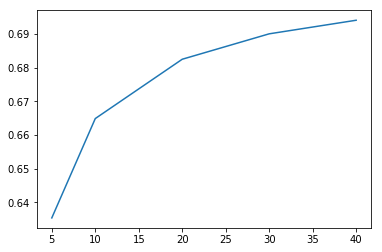

In [7]:
'''
У меня получились следующие результаты:

tree count:  5  roc_auc:  0.635357433114 time: 0:00:15.376037
tree count:  10  roc_auc:  0.664850687975 time: 0:00:26.363707
tree count:  20  roc_auc:  0.682461876804 time: 0:00:52.652367
tree count:  30  roc_auc:  0.690006471039 time: 0:01:14.910629
tree count:  40  roc_auc:  0.694038724512 time: 0:01:34.234331
'''

import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.plot(n_list,results)
'''
Видно, что увеличение количества деревьев приносит результат, но чем дальше, тем меньше.
Будет полезнее улучшать данные.
Краткий отчёт в одном месте:
1. 
first_blood_time  omits  19553  values;
first_blood_team  omits  19553  values;
first_blood_player1  omits  19553  values;
first_blood_player2  omits  43987  values;
radiant_bottle_time  omits  15691  values;
radiant_courier_time  omits  692  values;
radiant_flying_courier_time  omits  27479  values;
radiant_first_ward_time  omits  1836  values;
dire_bottle_time  omits  16143  values;
dire_courier_time  omits  676  values;
dire_flying_courier_time  omits  26098  values;
dire_first_ward_time  omits  1826  values;
Для first_blood_player1 и first_blood_player2 можно сказать,
что данные достаточно редкие, видимо, не всегда они есть в доступной для парсера статистике. 
2. 
radiant_win
3. 
74.91 секунды
4. 
Нет, не имеет, нужно улучшать предварительную обработку данных. Для ускорения обучения можно использовать
не всю выборку, а лишь некоторое случайное подмножество или уменьшить глубину деревьев

'''

In [3]:
'''
Функция, инкапсулирующая в себе обучение, кросс-валидацию и подсчёт метрики
'''
def getMetrics(n):
    auc_roc=0;
    kf=KFold(n_splits=5,shuffle=True,random_state=42)
    clf=GradientBoostingClassifier(n_estimators=n, random_state=42)
    for train,test in kf.split(features,y):
        clf.fit(features.iloc[train],y.iloc[train])
        pred=clf.predict_proba(features.iloc[test])[:,1]
        auc_roc+=roc_auc_score(y.iloc[test],pred)
    return auc_roc/5;

In [33]:
'''
Время логистической регрессии! Данные у нас уже получены и обработаны, можно сразу учить
'''
from sklearn.linear_model import pred=clf.predict_proba(features.iloc[test])[:,1]
#for c in [0.001,0.01,0.1,1,10,100,1000,10000,100000]:
#    print(c,getLogMetrics(c))
clf=LogisticRegression(C=0.00000001,penalty='l2')
clf.fit(features,y)
pred=clf.predict_proba(features)[:,1]
pred

array([ 0.5183577 ,  0.51835797,  0.51835806, ...,  0.51861537,
        0.51861538,  0.51861565])

In [24]:
def getLogMetrics(n):
    auc_roc=0;
    kf=KFold(n_splits=5,shuffle=True,random_state=42)
    clf=LogisticRegression(C=n,penalty='l2')
    for train,test in kf.split(features,y):
        clf.fit(features.iloc[train],y.iloc[train])
        pred=clf.predict_proba(features.iloc[test])[:,1]
        auc_roc+=roc_auc_score(y.iloc[test],pred)
    return auc_roc/5;

In [3]:
win=features[features.radiant_win==1]
lost=features[features.radiant_win==0]

In [ ]:
%matplotlib inline
plt.figure()
win.r1_gold.plot(kind='bar',style='dict')

In [4]:
%matplotlib inline
plt.figure()
lost.r1_gold.plot(kind='hist')

NameError: name 'plt' is not defined

In [6]:
print(list(features.columns.values))


['start_time', 'lobby_type', 'r1_hero', 'r1_level', 'r1_xp', 'r1_gold', 'r1_lh', 'r1_kills', 'r1_deaths', 'r1_items', 'r2_hero', 'r2_level', 'r2_xp', 'r2_gold', 'r2_lh', 'r2_kills', 'r2_deaths', 'r2_items', 'r3_hero', 'r3_level', 'r3_xp', 'r3_gold', 'r3_lh', 'r3_kills', 'r3_deaths', 'r3_items', 'r4_hero', 'r4_level', 'r4_xp', 'r4_gold', 'r4_lh', 'r4_kills', 'r4_deaths', 'r4_items', 'r5_hero', 'r5_level', 'r5_xp', 'r5_gold', 'r5_lh', 'r5_kills', 'r5_deaths', 'r5_items', 'd1_hero', 'd1_level', 'd1_xp', 'd1_gold', 'd1_lh', 'd1_kills', 'd1_deaths', 'd1_items', 'd2_hero', 'd2_level', 'd2_xp', 'd2_gold', 'd2_lh', 'd2_kills', 'd2_deaths', 'd2_items', 'd3_hero', 'd3_level', 'd3_xp', 'd3_gold', 'd3_lh', 'd3_kills', 'd3_deaths', 'd3_items', 'd4_hero', 'd4_level', 'd4_xp', 'd4_gold', 'd4_lh', 'd4_kills', 'd4_deaths', 'd4_items', 'd5_hero', 'd5_level', 'd5_xp', 'd5_gold', 'd5_lh', 'd5_kills', 'd5_deaths', 'd5_items', 'first_blood_time', 'first_blood_team', 'first_blood_player1', 'first_blood_playe